# 1. Background of the Study

## Title of the Study
### **Classifying Filipino Families by Income Group Using Socio-Demographic and Expenditure Data**

***

## Source of Data
| Attribute | Details |
| :--- | :--- |
| **Dataset Name** | Family Income and Expenditure Survey (FIES) — Philippines |
| **Primary Source** | Philippine Statistics Authority (PSA) |
| **Acquisition Source** | Kaggle — Family Income and Expenditure Dataset |

***

## Brief Description of the Dataset
The dataset provides detailed information on Filipino households’ **annual income**, **sources of earnings**, and comprehensive **patterns of expenditure**. It contains both quantitative (numerical) and categorical features that describe the household’s socio-economic profile.

* **Number of Rows and Columns:** 41544 rows and 60 columns
* **Sample Variables:**
    * `Region` – geographic region of the household (Categorical)
    * `Household_Head_Age` – age of the family head (Quantitative)
    * `Education` – highest educational attainment (Categorical/Ordinal)
    * `Family_Size` – total number of family members (Quantitative)
    * `Total_Income` – total annual family income (Quantitative)
    * `Food_Expenditure`, `Education_Expenditure`, `Housing_Expenditure`, etc. – detailed spending categories (Quantitative)

***

## Machine Learning Task Details

### Selected Features (Independent Variables)
The model will utilize a combination of socio-demographic and spending-related factors as input features, including:
* Region
* Education level and age of household head
* Family size
* Major expenditure categories (food, housing, education, transportation, etc.)

### Target / Label Column (Dependent Variable)
The target variable is the engineered class label: `Income_Class`. This represents a **Binary Classification** problem.

| Label | Group | Definition |
| :---: | :--- | :--- |
| **0** | **Low-Income Group** | Families with an annual income at or **below** the national median income. |
| **1** | **High-Income Group** | Families with an annual income **above** the national median income. |

### Objective of the Study
The objective is to build a robust **machine learning classification model** (e.g., Random Forest) that accurately predicts whether a Filipino family belongs to the High-Income (1) or Low-Income (0) group based on their observed demographic characteristics and expenditure patterns. The study aims to identify the key features that drive this economic classification, providing insights for targeted poverty or welfare policies.

---
# 2. Data Collection / Loading
The dataset used in this study is the Family Income and Expenditure Survey (FIES), publicly available on Kaggle. It contains socio-economic and spending data of Filipino households, based on surveys originally conducted by the Philippine Statistics Authority (PSA). The data is stored in a CSV file format (Family Income and Expenditure.csv) and is imported using the pandas library for data analysis and manipulation.

In [1]:
# Importing necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Family Income and Expenditure.csv')

In [2]:
# rows and columns of the dataframe
df.shape

(41544, 60)

In [3]:
# displaying the first few rows of the dataframe 
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


---
# 3. Data Information and Summary Statistics
This section provides an overview of the dataset's structure, data types, and the initial statistical distribution of the variables, which is crucial for identifying necessary preprocessing and cleaning steps

In [4]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [5]:
df.shape

(41544, 60)

In [6]:
# check dataframe shape if have null values
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [343]:
# check if household head occupation have null values
df['Household Head Occupation'].isnull().sum()

np.int64(7536)

In [7]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


## Findings:
- The dataset contains 41,544 rows (representing individual families/households) and 60 columns (features). 
- A check for null values across the entire dataset revealed zero missing entries (as confirmed by the count row being uniform across all columns) except for Household Head Occupation that has 7,536 missing values.
- the data is complete but exhibits high skewness and large differences in feature scales. The next steps in data cleaning and pre-processing must focus on handling the income skew and scaling all numerical features.

---
# 4. Data Cleaning
This section addresses inconsistencies and prepares the raw features for the subsequent Data Engineering steps.

### 4.1 Dropping Unneeded Columns
This process involves permanently removing columns from the DataFrame that are redundant, irrelevant, or potentially harmful to the modeling process.

In [8]:
# list all the columns in the dataframe
pd.DataFrame({'Column Names': df.columns})

,Column Names
0,Total Household Income
1,Region
2,Total Food Expenditure
3,Main Source of Income
4,Agricultural Household indicator
5,Bread and Cereals Expenditure
6,Total Rice Expenditure
7,Meat Expenditure
8,Total Fish and marine products Expenditure
9,Fruit Expenditure


In [9]:
df.drop(columns=[
    'Total Household Income',  # Must be dropped to ensure the model learns from the predictors and not the answer itself.

    # The informations is sufficiently captured by Total Food Expenditure. Keeping all detailed food items introduces multicollinearity.
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure', 
    'Fruit Expenditure',
    'Vegetables Expenditure',

    # Redundant: Less Predictive Detailed Expenditures
    'Restaurant and hotels Expenditure', 

    # Redundant: This is a calculated value highly correlated with Housing and water Expenditure and House Floor Area.
    'Imputed House Rental Value', 
    
    # Redundant: with Occupation/Class of Worker
    'Household Head Job or Business Indicator',
    
    # Redundant: with Main Source of Income
    'Total Income from Entrepreneurial Acitivites', 
    
    # Redundant: Information is sufficiently captured by Total Number of Family members.
    'Members with age less than 5 year old',
    'Members with age 5 - 17 years old', 
    
    # Redundant/Correlated: Often correlated with Type of Building/House and House Floor Area.
    'Type of Roof', 
    'Type of Walls', 
    'Toilet Facilities', 
    
    # Low Variance: These are standard utilities for most households; they offer little power to differentiate between income classes.
    'Electricity', 
    'Main Source of Water Supply',

    # Low Differential/Obsolete: Less discriminatory for high income than a car or AC unit. CD/VCD are obsolete indicators.
    'Number of Television', 
    'Number of CD/VCD/DVD', 
    'Number of Component/Stereo set', 
    
    #Obsolete Indicator: Mobile phones are the standard.
    'Number of Landline/wireless telephones',

    #Noise/Redundant: Already covered by Main Source of Income.
    'Agricultural Household indicator',

    # Noise: Highly variable and not a consistent economic class indicator.
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',

    # Noise/Less Predictive: Less consistent predictor than housing/education. Households may not necessarily spend more if they earn a lot.
    'Clothing, Footwear and Other Wear Expenditure',

    # Noise: Too broad and captures inconsistent spending.
    'Miscellaneous Goods and Services Expenditure',

    # Noise: Random, non-structural spending that does not reflect structural income.
    'Special Occasions Expenditure',

    # Noise/Redundant: Covered by Main Source of Income.
    'Crop Farming and Gardening expenses',
    
    # Less Variance/Redundant: Covered by Marital Status and Family Size.
    'Type of Household',
    
    # Noisy/Unreliable: Often difficult to measure reliably and less predictive than Floor Area.
    'House Age',

    # Niche/Less Differential: Niche vehicles; Car/Jeep/Van is the superior differentiator.
    'Number of Motorized Banca', 
    'Number of Motorcycle/Tricycle'
], inplace=True)

In [10]:
# list all the columns in the dataframe after dropping unneeded columns
pd.DataFrame({
    'Column': df.columns,
    'Type': df.dtypes.values
})

,Column,Type
0,Region,object
1,Total Food Expenditure,int64
2,Main Source of Income,object
3,Housing and water Expenditure,int64
4,Medical Care Expenditure,int64
5,Transportation Expenditure,int64
6,Communication Expenditure,int64
7,Education Expenditure,int64
8,Household Head Sex,object
9,Household Head Age,int64


## Summary:
- Dropped the original Total Household Income column and 33 noisy/redundant/detailed columns to ensure the model learns from the predictors and not the answer itself and prevents multicollinearity.
- All rows have inputs and is not null.

---
# 5. Data Engineering / pre-processing
This section transform the cleaned, consistent data into a format that machine learning algorithms can efficiently process. It is primarily focused on making the features mathematically and statistically suitable for modeling.

### 5.1 Feature Encoding (Handling Categorical Data)
Machine learning models only understand numbers, so any text-based (categorical) data must be converted into numerical representations.

In [11]:
# check all object type columns
df.dtypes[df.dtypes == 'object']

Region                                    object
Main Source of Income                     object
Household Head Sex                        object
Household Head Marital Status             object
Household Head Highest Grade Completed    object
Household Head Occupation                 object
Household Head Class of Worker            object
Type of Building/House                    object
Tenure Status                             object
dtype: object

In [12]:
# check first 5 rows of object type columns
df.select_dtypes(include=['object']).head()

,Region,Main Source of Income,Household Head Sex,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Occupation,Household Head Class of Worker,Type of Building/House,Tenure Status
0,CAR,Wage/Salaries,Female,Single,Teacher Training and Education Sciences Programs,General elementary education teaching professi...,Worked for government/government corporation,Single house,Own or owner-like possession of house and lot
1,CAR,Wage/Salaries,Male,Married,Transport Services Programs,Transport conductors,Worked for private establishment,Single house,Own or owner-like possession of house and lot
2,CAR,Wage/Salaries,Male,Married,Grade 3,Farmhands and laborers,Worked for private establishment,Single house,Own or owner-like possession of house and lot
3,CAR,Wage/Salaries,Male,Married,Elementary Graduate,Rice farmers,Employer in own family-operated farm or business,Single house,Own or owner-like possession of house and lot
4,CAR,Wage/Salaries,Male,Married,Elementary Graduate,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single house,Own or owner-like possession of house and lot


In [13]:
# For specific columns
columns_to_check = ['Region', 'Main Source of Income','Household Head Sex', 
                    'Household Head Marital Status', 'Household Head Highest Grade Completed',
                    'Household Head Occupation', 'Household Head Class of Worker',
                    'Type of Building/House', 'Tenure Status']

for col in columns_to_check:
    print(f"\n{col}:")
    print(df[col].unique())


Region:
['CAR' 'Caraga' 'VI - Western Visayas' 'V - Bicol Region' ' ARMM'
 'III - Central Luzon' 'II - Cagayan Valley' 'IVA - CALABARZON'
 'VII - Central Visayas' 'X - Northern Mindanao' 'XI - Davao Region'
 'VIII - Eastern Visayas' 'I - Ilocos Region' 'NCR' 'IVB - MIMAROPA'
 'XII - SOCCSKSARGEN' 'IX - Zasmboanga Peninsula']

Main Source of Income:
['Wage/Salaries' 'Other sources of Income' 'Enterpreneurial Activities']

Household Head Sex:
['Female' 'Male']

Household Head Marital Status:
['Single' 'Married' 'Widowed' 'Divorced/Separated' 'Annulled' 'Unknown']

Household Head Highest Grade Completed:
['Teacher Training and Education Sciences Programs'
 'Transport Services Programs' 'Grade 3' 'Elementary Graduate'
 'Second Year High School' 'Third Year High School'
 'Business and Administration Programs' 'First Year College'
 'High School Graduate'
 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or 

In [14]:
# print the count of unique values in each column
df_to_check_without_int_col = df.select_dtypes(exclude=['int64', 'float64'])

for col in columns_to_check:
    unique_counts = df_to_check_without_int_col.nunique()

print("\nUnique value counts for categorical columns:\n")
print(unique_counts)


Unique value counts for categorical columns:

Region                                     17
Main Source of Income                       3
Household Head Sex                          2
Household Head Marital Status               6
Household Head Highest Grade Completed     46
Household Head Occupation                 378
Household Head Class of Worker              7
Type of Building/House                      6
Tenure Status                               8
dtype: int64


### Findings:
- columns that has low cardinality (Region, Main Source of Income, etc.) can be encode using **one-hot encoding** and **binary-encoding** (Male = 0, Female = 1)
- columns with too many cardinality like **Household Head Highest Grade Completed** and **Household Head Occupation** needs to be encoded in different way

---

### 5.1.2 One-hot Encoding and Binary Encoding Columns
To prepare the dataset for machine learning, categorical variables must be converted into numerical form so that the Random Forest Classifier can interpret them effectively. Two encoding techniques were used in this study — **One-Hot Encoding and Binary Encoding** — depending on the number of unique categories in each column.

- **One-hot encoding** - was applied to categorical features with a small number of unique values.
- **Binary encoding** - was used for features containing only two categories.


In [15]:
print(f"Original shape: {df.shape}")

# List of columns to one-hot encode
categorical_columns = [
    'Region',
    'Main Source of Income',
    'Household Head Marital Status',
    'Household Head Class of Worker',
    'Type of Building/House',
    'Tenure Status'
]

# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

from sklearn.preprocessing import LabelEncoder

# Encode Sex column (Female = 0, Male = 1)
le = LabelEncoder()
df['Household Head Sex'] = le.fit_transform(df['Household Head Sex'])


# Display the shape before and after encoding

print(f"Encoded shape: {df.shape}")



Original shape: (41544, 27)
Encoded shape: (41544, 68)


---
### 5.1.3 Ordinal Encoding - Household Head Highest Grade Completed (46 Categories)
The “Household Head Highest Grade Completed” column contains 46 unique categories representing various levels of educational attainment. Since education follows a natural progression or order (from no education to postgraduate studies), it is most appropriate to represent this feature using Ordinal Encoding.

Ordinal Encoding converts each category into a numerical value based on its relative rank or educational level. This approach preserves the inherent order among categories, allowing the model to interpret higher numerical values as higher levels of education.

In [16]:
# All specific 'Programs' are assigned the same high rank (20) as they imply a degree/specialization.
education_rank_map = {
    # ------------------ Rank 1-9: Elementary School ------------------
    'No Grade Completed': 1,
    'Basic Programs': 2,
    'Preschool': 2,
    'Grade 1': 3,
    'Grade 2': 4,
    'Grade 3': 5,
    'Grade 4': 6,
    'Grade 5': 7,
    'Grade 6': 8,
    'Elementary Graduate': 9,

    # ------------------ Rank 10-13: High School ------------------
    'First Year High School': 10,
    'Second Year High School': 11,
    'Third Year High School': 12,
    'High School Graduate': 13,

    # ------------------ Rank 14-15: Post Secondary ------------------
    'First Year Post Secondary': 14,
    'Second Year Post Secondary': 15,

    # ------------------ Rank 16-19: College Years ------------------
    'First Year College': 16,
    'Second Year College': 17,
    'Third Year College': 18,
    'Fourth Year College': 19,

    # ------------------ Rank 20: Baccalaureate/Degree Programs ------------------
    # All 25 Program categories are ranked equally at 20 (Degree Equivalent)
    'Teacher Training and Education Sciences Programs': 20,
    'Transport Services Programs': 20,
    'Business and Administration Programs': 20,
    'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree': 20,
    'Humanities Programs': 20,
    'Engineering and Engineering Trades Programs': 20,
    'Engineering and Engineering trades Programs': 20,
    'Social and Behavioral Science Programs': 20,
    'Agriculture, Forestry, and Fishery Programs': 20,
    'Health Programs': 20,
    'Security Services Programs': 20,
    'Computing/Information Technology Programs': 20,
    'Mathematics and Statistics Programs': 20,
    'Personal Services Programs': 20,
    'Law Programs': 20,
    'Journalism and Information Programs': 20,
    'Architecture and Building Programs': 20,
    'Manufacturing and Processing Programs': 20,
    'Life Sciences Programs': 20,
    'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)': 20,
    'Social Services Programs': 20,
    'Physical Sciences Programs': 20,
    'Arts Programs': 20,
    'Veterinary Programs': 20,
    'Environmental Protection Programs': 20,

    # ------------------ Rank 21: Post Graduate ------------------
    'Post Baccalaureate': 21
}

column_name = 'Household Head Highest Grade Completed'

df['Education_Rank'] = df[column_name].map(education_rank_map)

df['Education_Rank'] = df['Education_Rank'].fillna(0).astype(int)

df = df.drop(columns=[column_name])

print("Ordinal Encoding applied successfully.\n")
print(df[['Education_Rank']].head())

Ordinal Encoding applied successfully.

   Education_Rank
0              20
1              20
2               5
3               9
4               9


---
### 5.1.4 Frequency Encoding - Household Head Occupation (378 Categories)
The “Household Head Occupation” column contains 378 unique categories, representing a wide range of job titles and professions. Because of its high cardinality, using one-hot encoding would result in an extremely large number of columns, leading to increased computational cost and potential model overfitting. To address this, the column was transformed using **Frequency Encoding**.

**Frequency Encoding** - replaces each category with the number of times it appears in the dataset or its relative frequency (i.e., proportion of total records). This method effectively converts the categorical variable into a numerical feature that reflects how common or rare each occupation is.

In [17]:
occupation_col = 'Household Head Occupation'
freq_col = f'{occupation_col}_freq'

df[occupation_col] = df[occupation_col].fillna('Unknown_Occupation')
freq_encoding = df[occupation_col].value_counts().to_dict()
df[freq_col] = df[occupation_col].map(freq_encoding).astype(float)

# Check missing values after encoding
print(df.isnull().sum())



Total Food Expenditure                                            0
Housing and water Expenditure                                     0
Medical Care Expenditure                                          0
Transportation Expenditure                                        0
Communication Expenditure                                         0
                                                                 ..
Tenure Status_Rent house/room including lot                       0
Tenure Status_Rent-free house and lot with consent of owner       0
Tenure Status_Rent-free house and lot without consent of owner    0
Education_Rank                                                    0
Household Head Occupation_freq                                    0
Length: 69, dtype: int64


---
## 5.2 Create Target Variable
To enable supervised learning, the dataset required a target variable representing household income class. The “Total Household Income” feature was used as the primary indicator for this purpose.

A new binary column, Income_Class, was created to classify households into two groups:

0 – Low Income Class

1 – High Income Class

#### PHILIPPINE INCOME CLASSIFICATION (Based on PSA Standards)
According to the Philippine Statistics Authority (PSA), the official poverty threshold varies by region and family size. However, for a standardized classification, use the following approach:

- Method: Official PSA Poverty Threshold National Average Annual Poverty Threshold per Family: PHP 166,452 (or PHP 13,873 per month) This is the minimum income needed to meet basic food and non-food needs which is close to the median PHP 164,079.50. 

The threshold will be used for the study. Households or individuals earning below or equal to PHP 166,452 are classified as Low Income, while those earning above it are classified as High Income.
This binary categorization allows for a simplified yet meaningful model of income disparity, reflecting real-world socioeconomic divisions.


In [18]:
# Load the original dataset to access the 'Total Household Income' column
df_original = pd.read_csv('Family Income and Expenditure.csv')
income = df_original['Total Household Income']

PSA_POVERTY_THRESHOLD = 166452.50  # Annual per family

# Low-Income (0): Below poverty threshold
# High-Income (1): Above
#  poverty threshold
df['Income_Class'] = (income >= PSA_POVERTY_THRESHOLD).astype(int)


In [19]:
# save the cleaned dataframe to a new CSV file
df.to_csv('Cleaned_Family_Income_and_Expenditure.csv', index=False)


---
## 6. Data Visualization

This section explores the relationships between features and the target variable through visual analysis. Visualizations help identify patterns, correlations, and distributions that inform model selection and feature importance.

---
### 6.1 Distribution of Target Variable

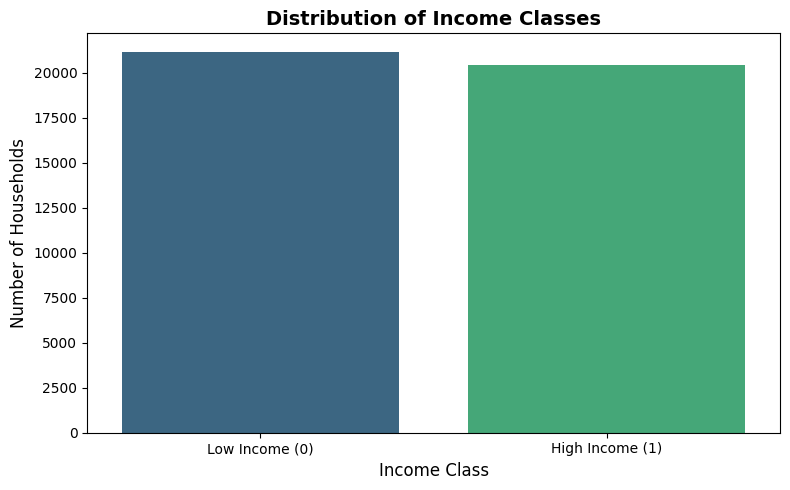


Class Distribution:
Low Income (0): 21124 (50.85%)
High Income (1): 20420 (49.15%)


In [21]:
# Check the distribution of Income_Class
plt.figure(figsize=(8, 5))
income_class_counts = df['Income_Class'].value_counts()

sns.barplot(x=income_class_counts.index, y=income_class_counts.values, hue=income_class_counts.index, palette='viridis', legend=False)

plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Households', fontsize=12)
plt.title('Distribution of Income Classes', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Low Income (0)', 'High Income (1)'])
plt.tight_layout()
plt.show()

print(f"\nClass Distribution:")
print(f"Low Income (0): {income_class_counts[0]} ({income_class_counts[0]/len(df)*100:.2f}%)")
print(f"High Income (1): {income_class_counts[1]} ({income_class_counts[1]/len(df)*100:.2f}%)")

---
#### Findings:

- Higher expenditures in education, housing, and transportation are associated with high-income households.

- Ownership of appliances (refrigerators, cars) and higher education rank are strong indicators of high income.

- These visualizations confirm that the selected features are meaningful predictors for the classification task.

### 6.2 Count Plot - Income Class Distribution by Key Categories


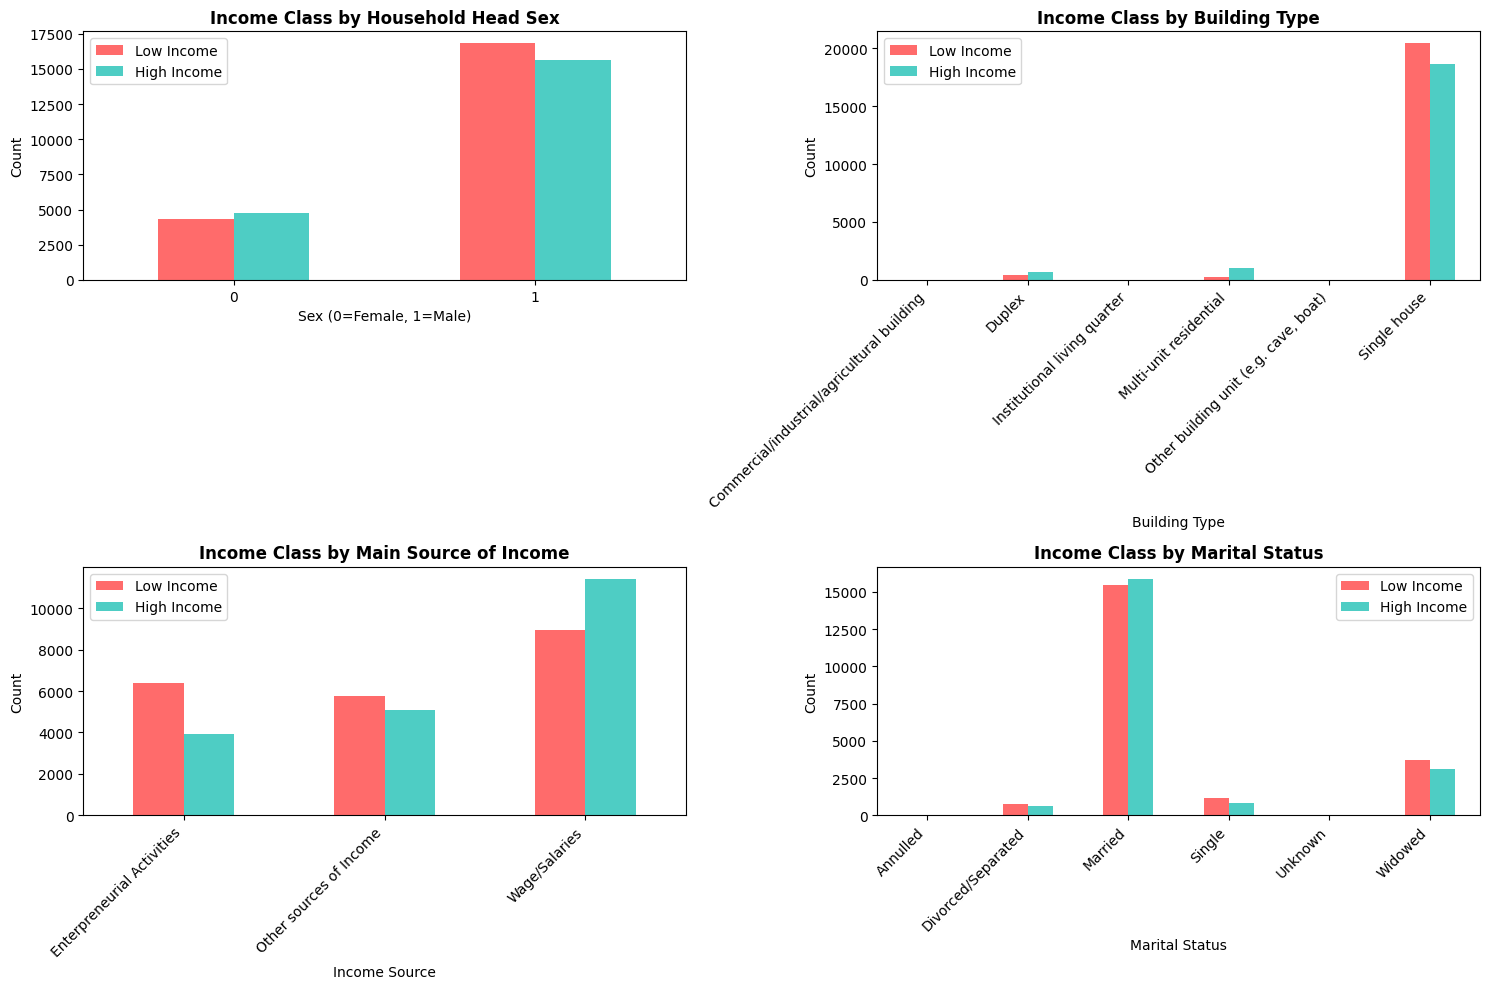

In [23]:
# Count plot for Income Class by Main Source of Income
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Income Class by Household Head Sex
income_sex = df.groupby(['Household Head Sex', 'Income_Class']).size().unstack()
income_sex.plot(kind='bar', ax=axes[0, 0], color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('Income Class by Household Head Sex', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sex (0=Female, 1=Male)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(['Low Income', 'High Income'])
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Income Class by Type of Building/House
building_cols = [col for col in df.columns if col.startswith('Type of Building/House_')]
building_data = []
for col in building_cols:
    building_type = col.replace('Type of Building/House_', '')
    low_count = df[df['Income_Class'] == 0][col].sum()
    high_count = df[df['Income_Class'] == 1][col].sum()
    building_data.append({'Type': building_type, 'Low Income': low_count, 'High Income': high_count})

building_df = pd.DataFrame(building_data)
building_df.plot(x='Type', kind='bar', ax=axes[0, 1], color=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_title('Income Class by Building Type', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Building Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(['Low Income', 'High Income'])
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# 3. Income Class by Main Source of Income
income_source_cols = [col for col in df.columns if col.startswith('Main Source of Income_')]
source_data = []
for col in income_source_cols:
    source_type = col.replace('Main Source of Income_', '')
    low_count = df[df['Income_Class'] == 0][col].sum()
    high_count = df[df['Income_Class'] == 1][col].sum()
    source_data.append({'Source': source_type, 'Low Income': low_count, 'High Income': high_count})

source_df = pd.DataFrame(source_data)
source_df.plot(x='Source', kind='bar', ax=axes[1, 0], color=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_title('Income Class by Main Source of Income', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Income Source')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(['Low Income', 'High Income'])
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4. Income Class by Household Head Marital Status
marital_cols = [col for col in df.columns if col.startswith('Household Head Marital Status_')]
marital_data = []
for col in marital_cols:
    marital_type = col.replace('Household Head Marital Status_', '')
    low_count = df[df['Income_Class'] == 0][col].sum()
    high_count = df[df['Income_Class'] == 1][col].sum()
    marital_data.append({'Status': marital_type, 'Low Income': low_count, 'High Income': high_count})

marital_df = pd.DataFrame(marital_data)
marital_df.plot(x='Status', kind='bar', ax=axes[1, 1], color=['#FF6B6B', '#4ECDC4'])
axes[1, 1].set_title('Income Class by Marital Status', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(['Low Income', 'High Income'])
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Findings:
- Count plots reveal how income classes are distributed across different categorical variables.

- Certain building types, income sources, and marital statuses show stronger associations with high-income households.

- These patterns help identify demographic factors that influence economic classification.


---
### 6.3 Correlation Heatmap

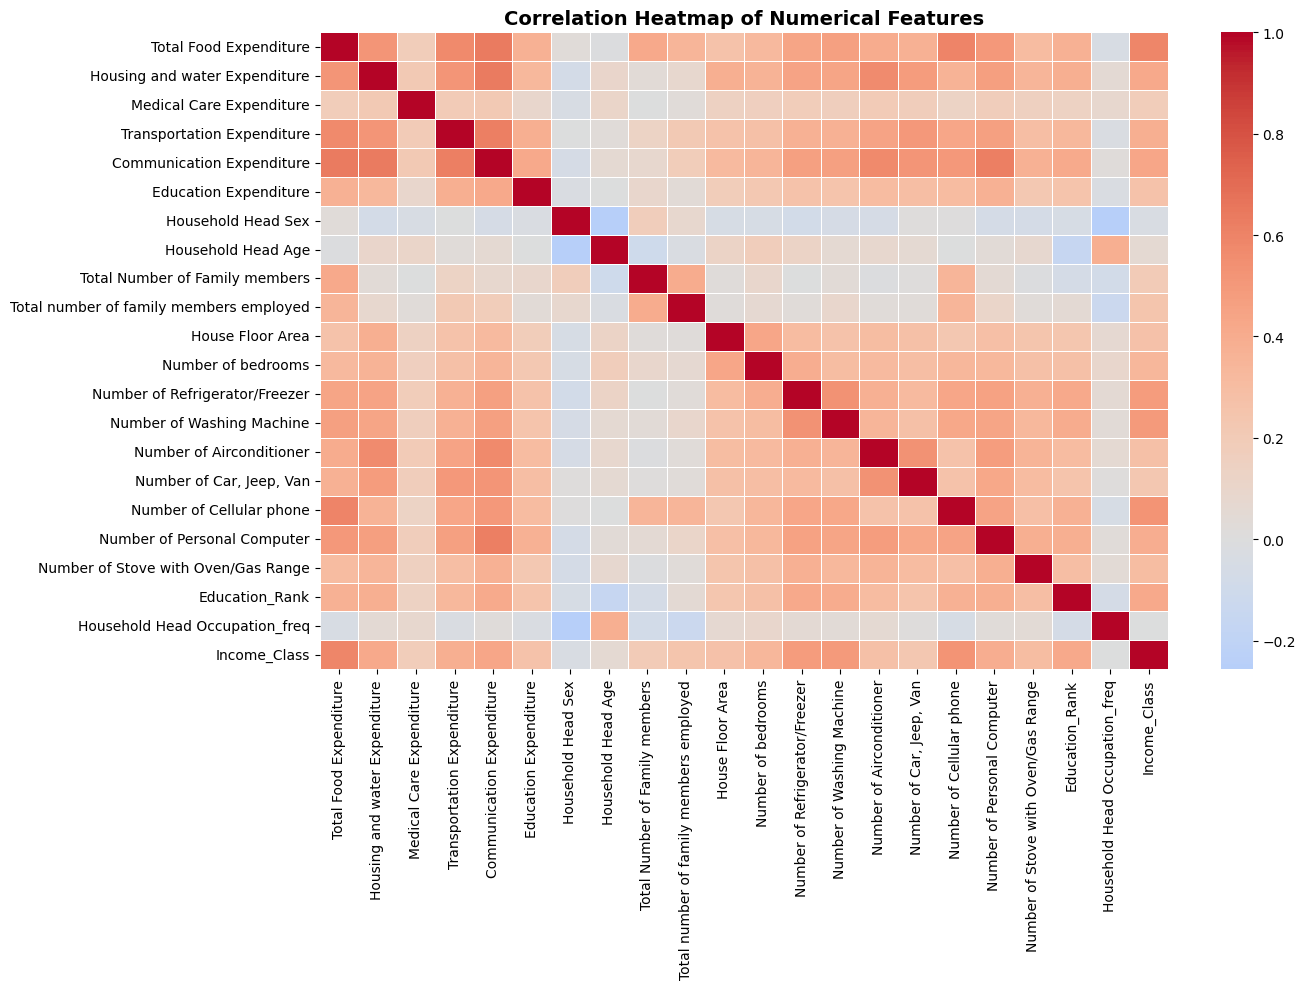


Top 10 Features Correlated with Income_Class:
Income_Class                      1.000000
Total Food Expenditure            0.587565
Number of Cellular phone          0.527088
Number of Washing Machine         0.493945
Number of Refrigerator/Freezer    0.486468
Communication Expenditure         0.435279
Education_Rank                    0.419836
Housing and water Expenditure     0.416369
Number of Personal Computer       0.391755
Transportation Expenditure        0.390676
Number of bedrooms                0.338143
Name: Income_Class, dtype: float64


In [24]:
# Select numerical features for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Display top correlations with target variable
target_corr = correlation_matrix['Income_Class'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Income_Class:")
print(target_corr.head(11))  # 11 to include Income_Class itself

---
#### Findings:

- Features with high positive correlation with Income_Class are strong predictors of high income.

- Features like expenditure categories, household appliances, and education rank are expected to show strong correlations.

- The heatmap reveals multicollinearity among features, which Random Forest can handle effectively.

---
### 6.4 Key Feature Distributions by Income Class


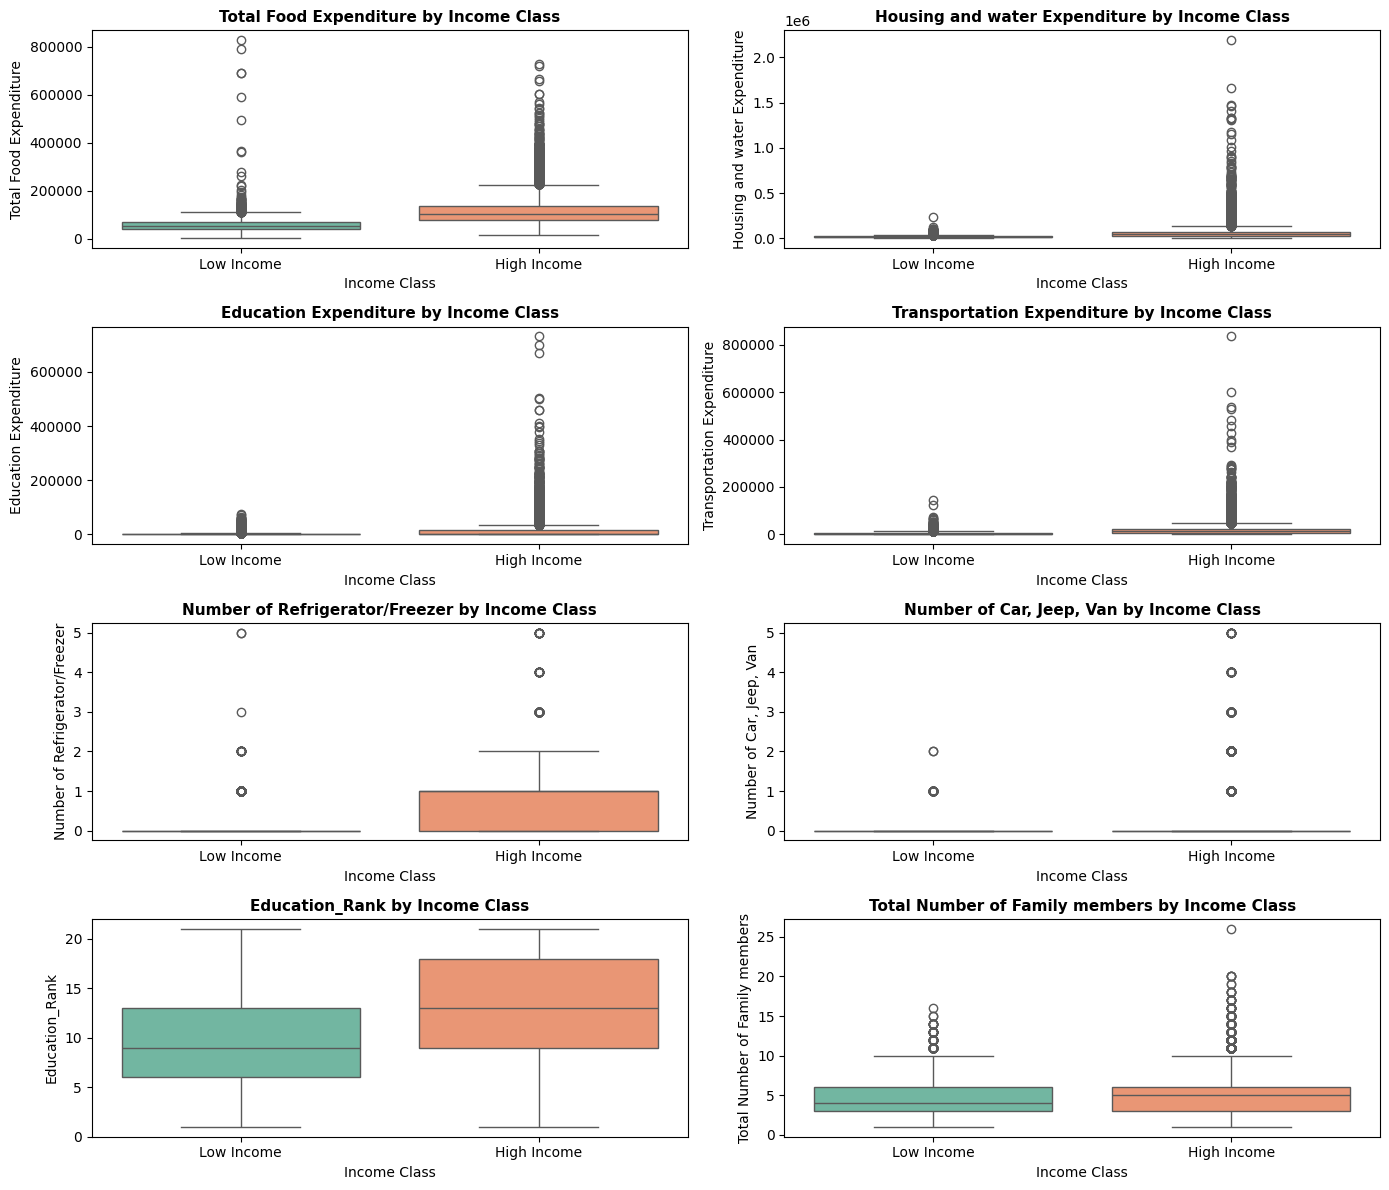

In [26]:
# Select key features to visualize
key_features = ['Total Food Expenditure', 'Housing and water Expenditure', 
                'Education Expenditure', 'Transportation Expenditure',
                'Number of Refrigerator/Freezer', 'Number of Car, Jeep, Van',
                'Education_Rank', 'Total Number of Family members']

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    sns.boxplot(x='Income_Class', y=feature, data=df, hue='Income_Class', 
                palette='Set2', ax=axes[idx], legend=False)
    axes[idx].set_xlabel('Income Class', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].set_title(f'{feature} by Income Class', fontsize=11, fontweight='bold')
    
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['Low Income', 'High Income'])

plt.tight_layout()
plt.show()

---
#### Findings:

- Higher expenditures in education, housing, and transportation are associated with high-income households.

- Ownership of appliances (refrigerators, cars) and higher education rank are strong indicators of high income.

- These visualizations confirm that the selected features are meaningful predictors for the classification task.

---

### 6.5 Regional Distribution of Income Classes

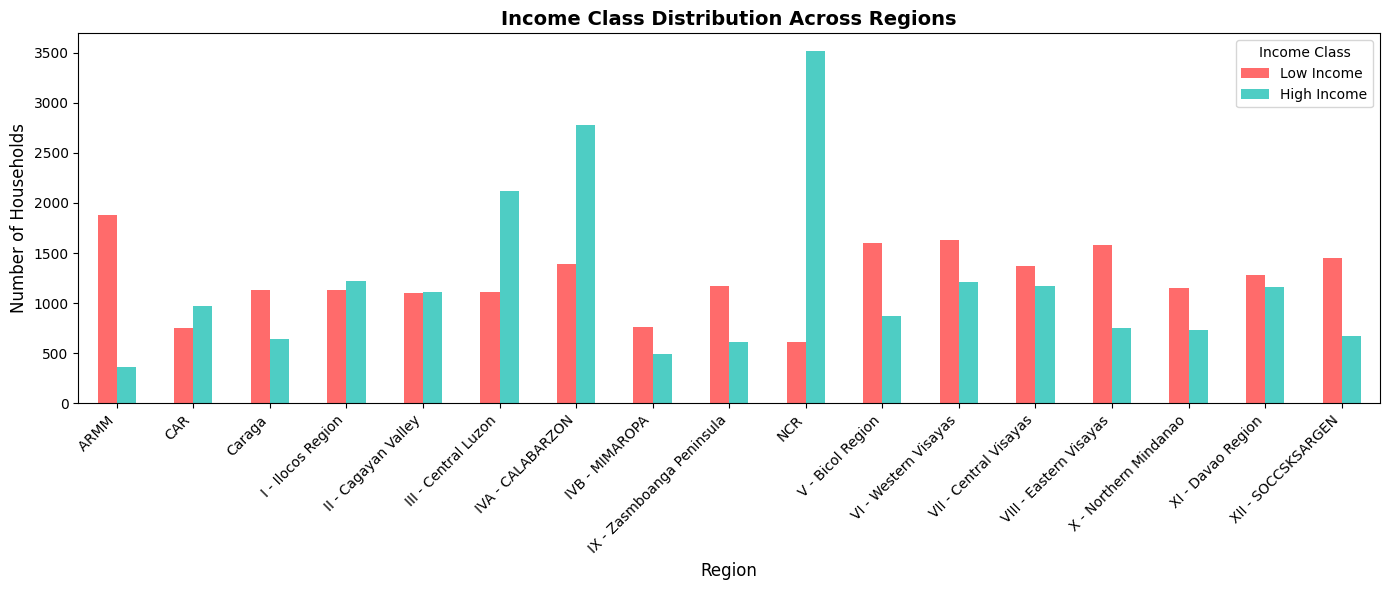

In [27]:
# Extract region columns (one-hot encoded)
region_cols = [col for col in df.columns if col.startswith('Region_')]

# Sum region values per income class
region_data = []
for col in region_cols:
    region_name = col.replace('Region_', '')
    low_income_count = df[df['Income_Class'] == 0][col].sum()
    high_income_count = df[df['Income_Class'] == 1][col].sum()
    region_data.append({'Region': region_name, 'Low Income': low_income_count, 'High Income': high_income_count})

region_df = pd.DataFrame(region_data)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
region_df.set_index('Region')[['Low Income', 'High Income']].plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4'])
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Households', fontsize=12)
plt.title('Income Class Distribution Across Regions', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Class')
plt.tight_layout()
plt.show()

### Findings:
- Regional disparities in income distribution are evident, with certain regions showing higher concentrations of high-income households.

- This geographic variation suggests that region is a relevant feature for the classification model.

---
# 7. Data Splitting (Training and Testing Set)

This section prepares the dataset for supervised learning by separating features from the target variable and splitting the data into training and testing subsets.

In [28]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Income_Class', 'Household Head Occupation'])  # Drop target and unencoded occupation column
y = df['Income_Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTesting set class distribution:")
print(y_test.value_counts())

Features shape: (41544, 68)
Target shape: (41544,)

Training set size: 33235 samples
Testing set size: 8309 samples

Training set class distribution:
Income_Class
0    16899
1    16336
Name: count, dtype: int64

Testing set class distribution:
Income_Class
0    4225
1    4084
Name: count, dtype: int64


### Summary:
- The dataset is split into 80% training data and 20% testing data using train_test_split.

- The stratify=y parameter ensures that both training and testing sets maintain the same proportion of low-income and high-income classes as the original dataset, preventing class imbalance issues.

- The random_state=42 ensures reproducibility of results.

---
## 8. Model Selection and Training

This section selects an appropriate machine learning algorithm for binary classification and trains it on the prepared dataset.

### 8.1 Model Selection: Random Forest Classifier

**Justification:**

The **Random Forest Classifier** was chosen for this binary classification task due to the following reasons:

1. **Handles Mixed Data Types:** The dataset contains both numerical and categorical (encoded) features, which Random Forest handles effectively without requiring extensive scaling.

2. **Robust to Overfitting:** By aggregating predictions from multiple decision trees, Random Forest reduces the risk of overfitting, especially with high-dimensional data like this dataset (68 features).

3. **Feature Importance:** Random Forest provides built-in feature importance scores, which help identify the key socio-demographic and expenditure factors that drive income classification.

4. **Non-Linear Relationships:** Unlike linear models, Random Forest captures complex, non-linear relationships between features and the target variable.

5. **No Need for Feature Scaling:** Random Forest is tree-based and does not require normalization or standardization of features.

---

### 8.2 Model Training

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=20,            # Maximum depth of each tree
    min_samples_split=10,    # Minimum samples required to split a node
    min_samples_leaf=5,      # Minimum samples required at a leaf node
    random_state=42,         # For reproducibility
    n_jobs=-1                # Use all available processors
)

# Train the model
print("Training Random Forest Classifier...")
rf_model.fit(X_train, y_train)
print("Model training completed successfully.\n")

# Display model parameters
print("Model Parameters:")
print(rf_model.get_params())

Training Random Forest Classifier...
Model training completed successfully.

Model Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### Explanation:

- **n_estimators=100**: The model creates 100 decision trees. More trees generally improve accuracy but increase computation time.

- **max_depth=20**: Limits the depth of each tree to prevent overfitting while allowing sufficient complexity to capture patterns.

- **min_samples_split=10** and **min_samples_leaf=5**: Control the minimum number of samples required to split nodes and form leaf nodes, further preventing overfitting.

- **random_state=42**: Ensures that the model produces consistent results across runs.
- **n_jobs=-1**: Utilizes all available CPU cores for faster training.

---

### 8.3 Feature Importance Analysis

Top 15 Most Important Features:
                                    Feature  Importance
0                    Total Food Expenditure    0.243641
1             Housing and water Expenditure    0.151668
4                 Communication Expenditure    0.111234
3                Transportation Expenditure    0.091411
16                 Number of Cellular phone    0.064828
12           Number of Refrigerator/Freezer    0.059790
17              Number of Personal Computer    0.035754
13                Number of Washing Machine    0.035572
2                  Medical Care Expenditure    0.030840
5                     Education Expenditure    0.027312
66                           Education_Rank    0.020081
10                         House Floor Area    0.018005
7                        Household Head Age    0.013387
9   Total number of family members employed    0.011531
11                       Number of bedrooms    0.010822


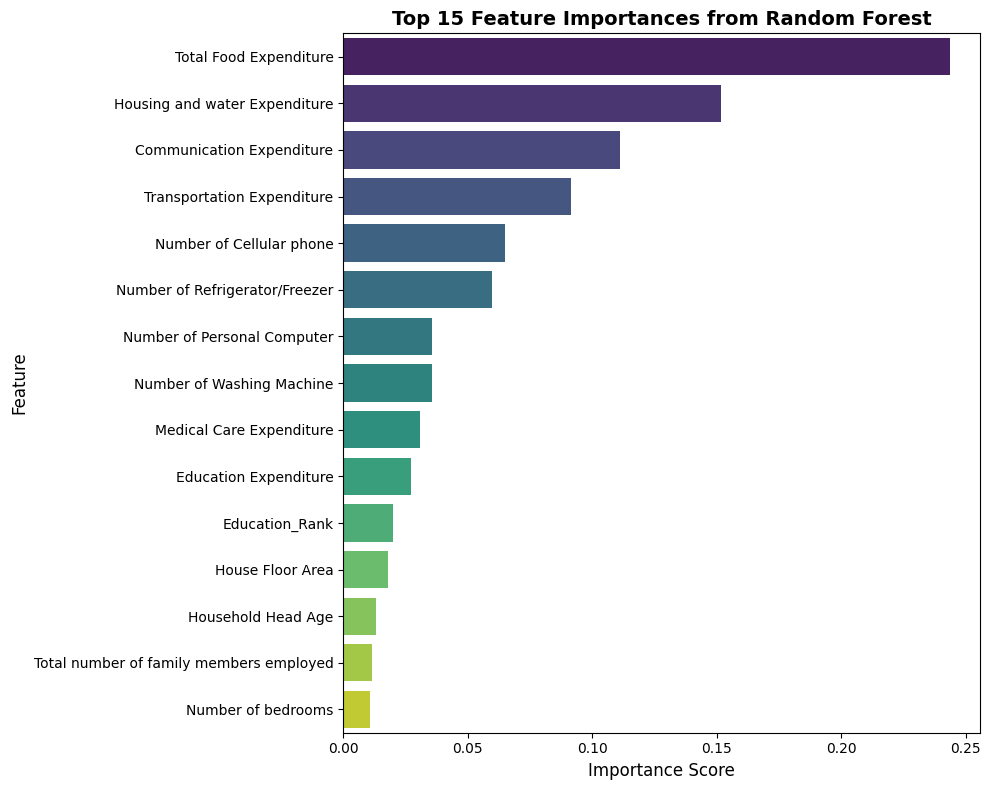

In [31]:
# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 15 most important features
print("Top 15 Most Important Features:")
print(feature_importances.head(15))

# Visualize feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature',
            data=feature_importances.head(15), 
            hue='Feature', palette='viridis', legend=False)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Feature Importances from Random Forest',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Findings:

- The feature importance scores reveal which variables contribute most to predicting income class.

- Expected important features include expenditure categories (food, housing, education), household appliances, education rank, and family size.

- This analysis provides insights for policymakers to identify key factors influencing household income levels.


---
## check niyo na lang gclass ni maam para sa guide
# 9. Prediction Values (if applicable)
# 10. Visualization of Model Analysis
# 11. Performance Metrics
# 12. Conclusion